In [37]:
import pickle
import numpy as np
from sklearn.cluster import SpectralClustering, AffinityPropagation

# file_path = '/media/zzs/4TB/qingliu/qing_intermediate/feat_pickle/'
# file_path = '/export/home/qliu24/qing_voting_data/qing_intermediate/feat_pickle/'
file_path = '/export/home/qliu24/qing_voting_data/intermediate/feat_pickle_VGG/'
fname = file_path + 'car_simmat_mthrh085_carVC.pickle'
with open(fname, 'rb') as fh:
    mat_dis1, mat_dis2 = pickle.load(fh)
    
print(mat_dis1.shape)

asp_ratio = []
types = []
view_point = []
# objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
objects = ['car']
for oo in objects:
    fname = file_path + 'res_info_' + oo + '_train_carVC.pickle'
    print('loading object {0}'.format(oo))
    with open(fname, 'rb') as fh:
        l, _, v = pickle.load(fh)
        types += [oo for ii in range(len(v))]
        view_point += v
        asp_ratio += [l[ii].shape[1]/l[ii].shape[0] for ii in range(len(v))]
        
N = len(types)
print('total number of instances {0}'.format(N))
# view_point = np.array(view_point)[:,0]

'''
asp_ratio = []
types = []
view_point = []
oo='car'
fname = file_path + 'res_info_' + oo + '_train.pickle'
print('loading object {0}'.format(oo))
with open(fname, 'rb') as fh:
    l, _, v = pickle.load(fh)
    types += [oo for ii in range(len(v))]
    view_point += v
    asp_ratio += [l[ii].shape[1]/l[ii].shape[2] for ii in range(len(v))]
    
N = len(types)
print('total number of instances {0}'.format(N))
'''
category='car'
'''
# oo2='motorbike'
id_obj = np.where(np.array(types)==category)[0]
# id_obj2 = np.where(np.array(types)==oo2)[0]
id_obj2=np.array([]).astype(int)
types = np.array(types)[np.append(id_obj, id_obj2)]
view_point = np.array(view_point)[np.append(id_obj, id_obj2)]
asp_ratio = np.array(asp_ratio)[np.append(id_obj, id_obj2)]
gridix = np.ix_(np.append(id_obj, id_obj2), np.append(id_obj, id_obj2))
mat_dis = mat_dis1[gridix]
N = len(types)
'''
mat_dis = mat_dis1
print('total number of instances {0}'.format(N))

(1000, 1000)
loading object car
total number of instances 1000
total number of instances 1000


In [38]:
# mat_dis = mat_dis1[0:N, 0:N]
mat_full = np.ones_like(mat_dis)
for nn in range(mat_full.shape[0]):
    mat_full[nn] = np.append(mat_dis[0:nn, nn], mat_dis[nn, nn:])
    
print(mat_full[0:10,0:10])

np.fill_diagonal(mat_full, 0)

W_mat = 1. - mat_full
print(np.mean(W_mat))
print(np.std(W_mat))

[[ 1.          0.8101397   0.85181248  0.91599063  0.68688041  0.73614195
   0.85928092  0.87961875  0.79276068  0.92891445]
 [ 0.8101397   1.          0.82050564  0.76157641  0.7081182   0.82019888
   0.83461035  0.79574798  0.69973487  0.89663552]
 [ 0.85181248  0.82050564  1.          0.89101386  0.87718822  0.82202496
   0.81065141  0.85424966  0.86798942  0.93366151]
 [ 0.91599063  0.76157641  0.89101386  1.          0.79258475  0.7920381
   0.63709196  0.91816786  0.7707773   0.91484943]
 [ 0.68688041  0.7081182   0.87718822  0.79258475  1.          0.86475649
   0.85840146  0.86187653  0.35168769  0.88359788]
 [ 0.73614195  0.82019888  0.82202496  0.7920381   0.86475649  1.
   0.82547738  0.88180629  0.89229708  0.9306662 ]
 [ 0.85928092  0.83461035  0.81065141  0.63709196  0.85840146  0.82547738
   1.          0.91224861  0.85416949  0.87074495]
 [ 0.87961875  0.79574798  0.85424966  0.91816786  0.86187653  0.88180629
   0.91224861  1.          0.88935151  0.8889121 ]
 [ 0.7927

In [39]:
for rr in np.random.randint(N,size=10):
    ref = rr
    print(types[ref], view_point[ref])
    dis_rst = mat_full[rr]
    min_idx = np.argsort(dis_rst)
    for tt in range(5):
        match = min_idx[tt]
        print(types[match], view_point[match], end=' ')
        
    print('.')

car 195
car 195 car 200 car 200 car 200 car 200 .
car 140
car 140 car 285 car 180 car 295 car 305 .
car 20
car 20 car 20 car 20 car 10 car 15 .
car 270
car 270 car 270 car 270 car 270 car 270 .
car 50
car 50 car 55 car 50 car 45 car 50 .
car 335
car 335 car 330 car 335 car 335 car 330 .
car 90
car 90 car 90 car 95 car 90 car 90 .
car 350
car 350 car 345 car 345 car 345 car 345 .
car 85
car 85 car 90 car 85 car 270 car 85 .
car 180
car 180 car 0 car 20 car 350 car 180 .


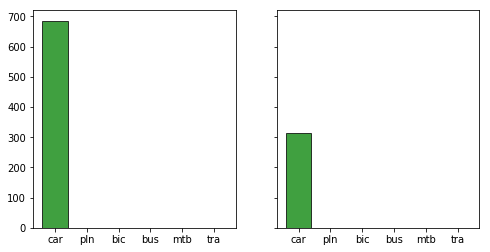

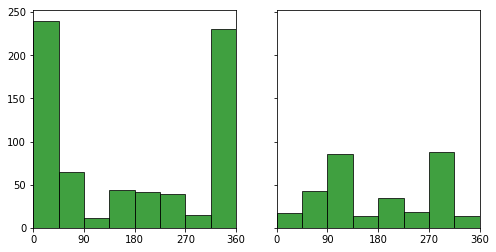

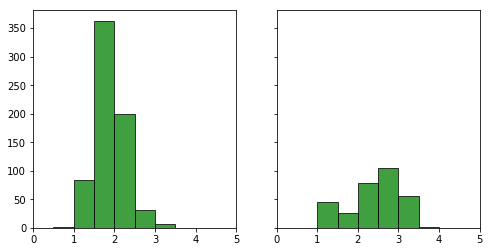

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

K = 2
cls_solver = SpectralClustering(n_clusters=K,affinity='precomputed', random_state=666)
lb = cls_solver.fit_predict(W_mat)
# af = AffinityPropagation(preference=0.00005, affinity = 'precomputed').fit(W_mat)
# cluster_centers_indices = af.cluster_centers_indices_
# lb = af.labels_
# print(np.unique(lb))

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
objects_s = ['car','pln','bic','bus','mtb','tra']
pos = np.arange(len(objects_s))
axes[0].set_xticks(pos)
axes[0].set_xticklabels(objects_s)
for k in range(K):
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[lb==k]==oo))
        
    axes[k].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,360])
axes[0].set_xticks([0,90,180,270,360])

for k in range(K):
    axes[k].hist(np.array(view_point)[lb==k], bins=8, range=[0,360], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()

f, axes = plt.subplots(1,K, sharex=True, sharey=True, figsize=(8,4))
axes[0].set_xlim([0,5])
axes[0].set_xticks([0,1,2,3,4,5])

for k in range(K):
    axes[k].hist(np.array(asp_ratio)[lb==k], bins=10, range=[0,5], facecolor='green', alpha=0.75,edgecolor='k')

plt.show()



In [41]:
np.mean(W_mat)

0.18579065030388342

0.199401013919 0.0992169261187
0.255073338432 0.109351093408


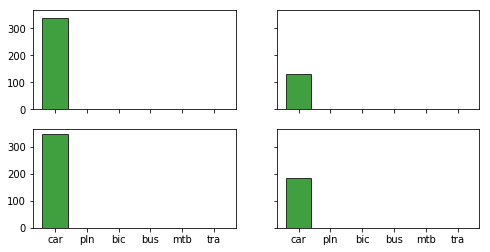

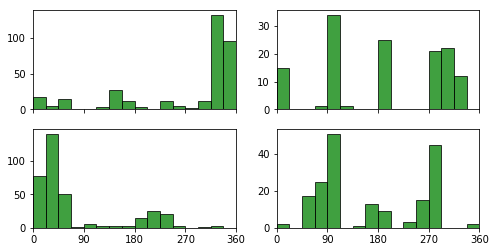

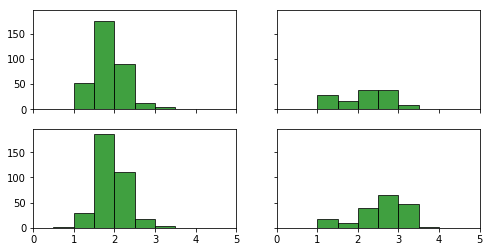

In [42]:
idx2 = []
W_mat2 = []
lb2 = []
for k in range(K):
    idx2.append(np.where(lb==k)[0])
    W_mat2.append(W_mat[np.ix_(idx2[k],idx2[k])])
    print(np.mean(W_mat2[k]), np.std(W_mat2[k]))
    
    cls_solver = SpectralClustering(n_clusters=2,affinity='precomputed', random_state=999)
    lb2.append(cls_solver.fit_predict(W_mat2[k]))
    
K2=2
f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,4))
objects_s = ['car','pln','bic','bus','mtb','tra']
pos = np.arange(len(objects_s))
axes[0][0].set_xticks(pos)
axes[0][0].set_xticklabels(objects_s)
for k in range(K2*K):
    a = k//2
    b = k%2
    freq = []
    for oo in objects:
        freq.append(sum(np.array(types)[idx2[a]][lb2[a]==b]==oo))
        
    axes[b][a].bar(pos, freq, color='green',alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=False, figsize=(8,4))
axes[0][0].set_xlim([0,360])
axes[0][0].set_xticks([0,90,180,270,360])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(view_point)[idx2[a]][lb2[a]==b], bins=16, range=[0,360], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

f, axes = plt.subplots(2,K, sharex=True, sharey=True, figsize=(8,4))
axes[0][0].set_xlim([0,5])
axes[0][0].set_xticks([0,1,2,3,4,5])
for k in range(K2*K):
    a = k//2
    b = k%2
    axes[b][a].hist(np.array(asp_ratio)[idx2[a]][lb2[a]==b], bins=10, range=[0,5], facecolor='green', alpha=0.75, edgecolor='k')

plt.show()

In [20]:
rst_lbs1 = np.ones(len(idx2[0]))*-1
rst_lbs1[np.where(lb2[0]==0)[0]] = 0
rst_lbs1[np.where(lb2[0]==1)[0]] = 1
rst_lbs2 = np.ones(len(idx2[1]))*-1
rst_lbs2[np.where(lb2[1]==0)[0]] = 2
rst_lbs2[np.where(lb2[1]==1)[0]] = 3


rst_lbs = np.ones(N)*-1
rst_lbs[idx2[0]] = rst_lbs1
rst_lbs[idx2[1]] = rst_lbs2

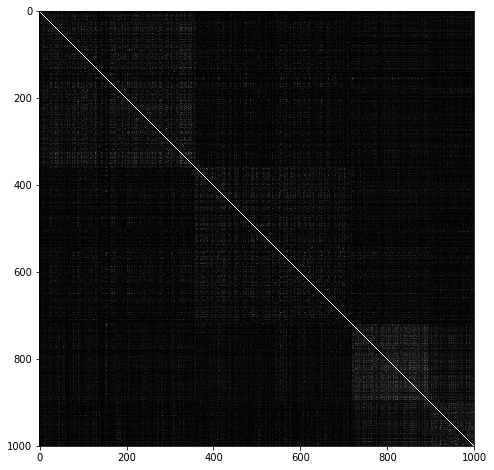

In [21]:
_idx = np.array([]).astype(int)
for kk in range(4):
    iidx = np.where(rst_lbs==kk)[0]
    _idx = np.append(_idx, iidx)
    
grid_ix = np.ix_(_idx, _idx)
plt.close()
plt.imshow(W_mat[grid_ix], interpolation='none')
plt.show()

In [9]:
fname = '/export/home/qliu24/qing_voting_data/intermediate/VCpart_model_car/{0}_k2_2_lbs.pickle'.format(category)
with open(fname, 'wb') as fh:
    pickle.dump(rst_lbs, fh)